In [1]:
@time import InsarTimeseries, MapImages, Sario
@time include("/home/scott/repos/InsarTimeseries.jl/scripts/plotting.jl")
@time include("/home/scott/repos/InsarTimeseries.jl/scripts/find_abs_shift.jl")
@time include("/home/scott/repos/InsarTimeseries.jl/scripts/point_analysis.jl")

pygui(false)  # Displays inline, but not zoom
# pygui(true)  # Opens new window

┌ Info: Recompiling stale cache file /home/scott/.julia/compiled/v1.2/InsarTimeseries/p9w0v.ji for InsarTimeseries [4d8af4f9-f3e5-5ea1-98ab-18303d53aedd]
└ @ Base loading.jl:1240
┌ Info: Recompiling stale cache file /home/scott/.julia/compiled/v1.2/MapImages.ji for MapImages [top-level]
└ @ Base loading.jl:1240


 88.338921 seconds (16.81 M allocations: 1018.797 MiB, 0.91% gc time)


┌ Info: Recompiling stale cache file /home/scott/.julia/compiled/v1.2/PyPlot/oatAj.ji for PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1240


 31.636311 seconds (13.85 M allocations: 706.664 MiB, 1.66% gc time)
  0.619057 seconds (1.36 M allocations: 68.945 MiB, 3.99% gc time)
unw_stack_file = "unw_stack.h5"


HDF5-DIAG: Error detected in HDF5 (1.10.4) thread 0:
  #000: H5F.c line 370 in H5Fis_hdf5(): unable open file
    major: File accessibilty
    minor: Not an HDF5 file
  #001: H5Fint.c line 802 in H5F__is_hdf5(): unable to open file
    major: Low-level I/O
    minor: Unable to initialize object
  #002: H5FD.c line 734 in H5FD_open(): open failed
    major: Virtual File Layer
    minor: Unable to initialize object
  #003: H5FDsec2.c line 346 in H5FD_sec2_open(): unable to open file: name = 'unw_stack.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0
    major: File accessibilty
    minor: Unable to open file


LoadError: LoadError: Cannot access file unw_stack.h5
in expression starting at /home/scott/repos/InsarTimeseries.jl/scripts/testl1.jl:57

1.3591659949050403


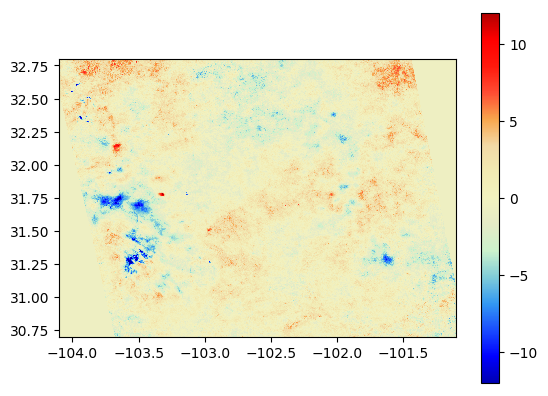

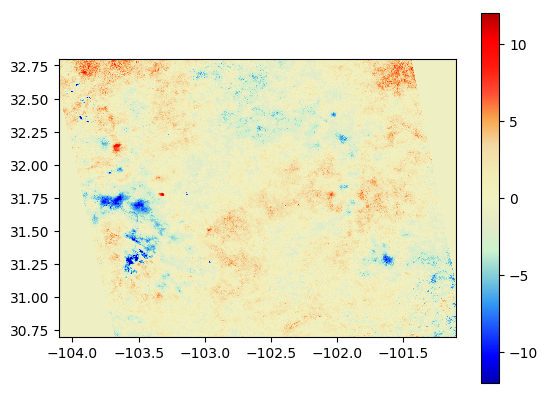

1.569816251028946


In [2]:
cd("/data1/scott/pecos/path78-bbox2/igrams_looked_18/")
plot_img("velocities_2017_linear_max700.h5", vm=12,cmap="seismic_wide_y", shift=-0.5)
println(rms(get_gps_error("velocities_2017_linear_max700.h5", station_name_list78, dset="velos/1", 
    verbose=false, window=5, shift=-0.5, ref_station="TXKM")))

plot_img("velocities_2017_linear_max700_nodecor.h5", vm=12,cmap="seismic_wide_y", shift=-0.5)
println(rms(get_gps_error("velocities_2017_linear_max700_nodecor.h5", station_name_list78, dset="velos/1", 
                   verbose=false, window=5, shift=-0.5, ref_station="TXKM")))


In [ ]:
# test = Sario.load("velocities_2017_linear_max700_withdecor.h5", dset_name="velos/1") .- Sario.load("velocities_2017_linear_max700.h5", dset_name="velos/1");
# plot_img(test, vm=5, cmap="seismic")

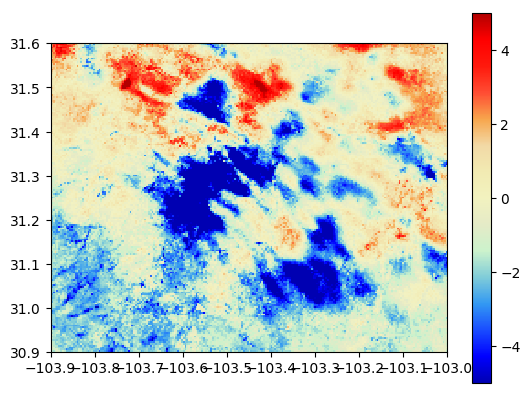

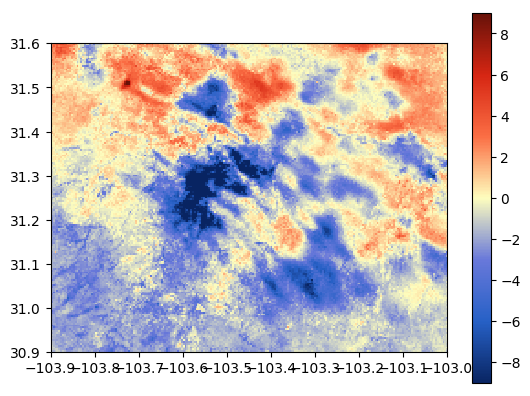

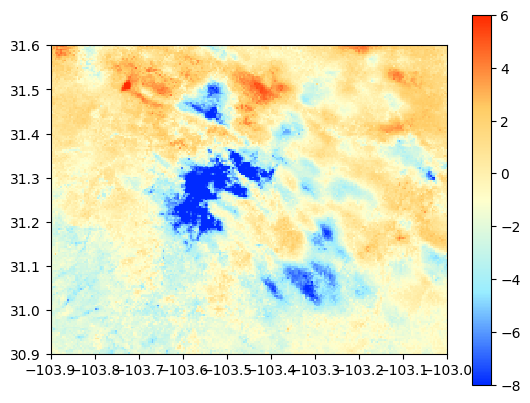

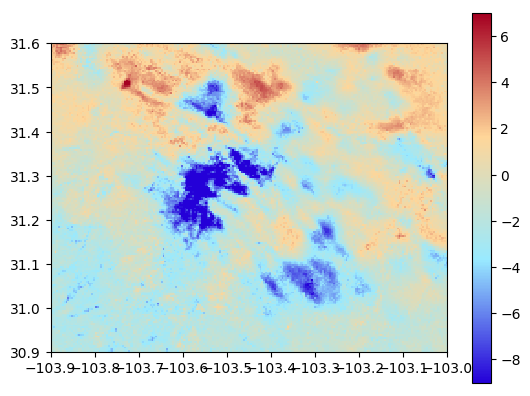

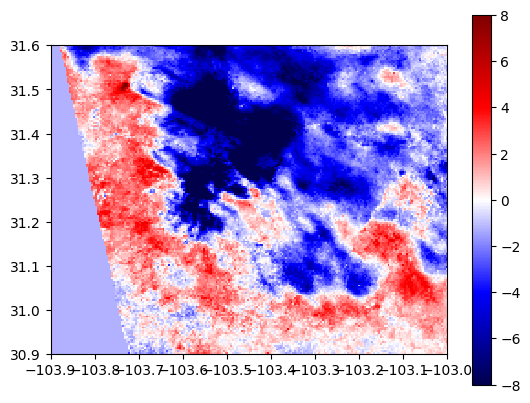

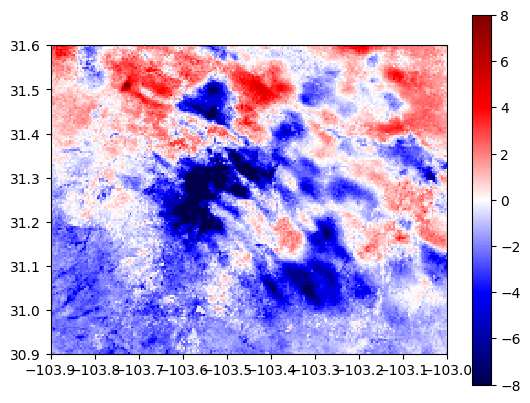

  0.344641 seconds (948.75 k allocations: 49.530 MiB, 4.19% gc time)


(PyPlot.Figure(PyObject <Figure size 640x480 with 2 Axes>), axes, MapImage{Float32,2}
  image: Array{Float32}((169, 217)) Float32[0.23484465 0.76481116 … -1.1675732 -0.8148304; 0.103740856 1.296225 … -1.7104133 -1.3995905; … ; -3.2996387 -3.5751474 … -2.783393 -3.3780077; -3.8497279 -4.060379 … -2.8191702 -3.78487]
  demrsc: Sario.DemRsc
)

In [3]:
# m1 = MapImage("/data1/scott/pecos/path78-bbox2/igrams_looked/velocities_2017_linear_max700.h5", "velos/1")
# m2 = MapImage("/data4/scott/path85/stitched/igrams_looked/velocities_2017_linear_max700.h5", "velos/1")

m1 = MapImage("/data1/scott/pecos/path78-bbox2/igrams_looked/velocities_2018_linear_max700.h5", "velos/1")
m2 = MapImage("/data4/scott/path85/stitched/igrams_looked/velocities_2018_linear_max700.h5", "velos/1")

lats, lons = (31.6, 30.9), (-103.9, -103.)
#plot_img("velocities_2017_linear_max700.h5", "velos/1")
@time include("/home/scott/repos/InsarTimeseries.jl/scripts/plotting.jl")
dv = pyimport("palettable.lightbartlein.diverging")
cmo = pyimport("palettable.cmocean.diverging")
cb = pyimport("palettable.colorbrewer.diverging")
cmgood = cb.RdYlBu_11_r.mpl_colormap



# plot_img(m1[lats, lons], cmap=dv.BlueDarkRed12_3.mpl_colormap, vm=10, shift=-1.2)
plot_img(m2[lats, lons], cmap="seismic_wide_y", vm=5, shift=2.3)
plot_img(m2[lats, lons], cmap="seismic_narrow_y", vm=9, shift=2.3)

plot_img(m2[lats, lons], cmap=dv.BlueOrange12_5.mpl_colormap, vmax=6, vmin=-8, shift=2.3)
# plot_img(m2[lats, lons], cmap=dv.BlueOrange12_7.mpl_colormap, vm=8, shift=2.1)
plot_img(m2[lats, lons], cmap=dv.BlueDarkRed18_4.mpl_colormap, vmax=7, vmin=-9, shift=2.1)
# plot_img(m2[lats, lons], cmap=dv.GreenMagenta_3.mpl_colormap, vm=8, shift=2.1)

plot_img(m1[lats, lons], cmap="seismic", vm=8, shift=-1.2)
plot_img(m2[lats, lons], cmap="seismic", vm=8, shift=2.3)

In [1]:
@time include("/home/scott/repos/InsarTimeseries.jl/scripts/plotting.jl")
dv = pyimport("palettable.lightbartlein.diverging")
cmo = pyimport("palettable.cmocean.diverging")
cb = pyimport("palettable.colorbrewer.diverging")

# m1 = MapImage("/data1/scott/pecos/path78-bbox2/igrams_looked_18/velocities_2017_linear_max700.h5", "velos/1")
# m2 = MapImage("/data4/scott/path85/stitched/igrams_looked_18/velocities_2017_linear_max700.h5", "velos/1")

m1 = MapImage("/data1/scott/pecos/path78-bbox2/igrams_looked_18/velocities_2018_linear_max700.h5", "velos/1")
m2 = MapImage("/data4/scott/path85/stitched/igrams_looked_18/velocities_2018_linear_max700.h5", "velos/1")

lats, lons = (31.6, 30.9), (-103.9, -103.)
#plot_img("velocities_2017_linear_max700.h5", "velos/1")


# plot_img(m1[lats, lons], cmap="seismic_narrow_y", vm=10, shift=-.2)
plot_img(m2[lats, lons], cmap="seismic_y", vmax=4, vmin=-6, shift=2.0)
# plot_img(m1[lats, lons], cmap=dv.RedYellowBlue_10_r.mpl_colormap, vmax=8, vmin=-10, shift=-1.2)
plot_img(m2[lats, lons], cmap=cb.RdYlBu_11_r.mpl_colormap, vmax=8, vmin=-10, shift=2.1)
plot_img(m2[lats, lons], cmap=cb.Spectral_11_r.mpl_colormap, vmax=10, vmin=-10, shift=2.1)
# plot_img(m1[lats, lons], cmap=dv.RedYellowBlue_9_r.mpl_colormap, vmax=8, vmin=-10, shift=-1.2)
# plot_img(m2[lats, lons], cmap=dv.RedYellowBlue_9_r.mpl_colormap, vmax=8, vmin=-10, shift=2.1)

┌ Info: Recompiling stale cache file /home/scott/.julia/compiled/v1.2/HDF5/L7Dga.ji for HDF5 [f67ccb44-e63f-5c2f-98bd-6dc0ccc4ba2f]
└ @ Base loading.jl:1240
┌ Info: Recompiling stale cache file /home/scott/.julia/compiled/v1.2/PyPlot/oatAj.ji for PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1240
┌ Info: Recompiling stale cache file /home/scott/.julia/compiled/v1.2/Polynomials/OaK78.ji for Polynomials [f27b6e38-b328-58d1-80ce-0feddd5e7a45]
└ @ Base loading.jl:1240


LoadError: UndefVarError: InsarTimeseries not defined

In [2]:
# plot_img(m1, cmap=cmgood, vm=12, shift=-1.2)
# pygui(true)
plot_img(m2, cmap=cmgood, vm=12, shift=2.3)
# plot_img(m1, cmap="seismic_wide_y", vm=12, shift=-1.2)
plot_img(m2, cmap="seismic_wide_y", vm=12, shift=2.)

# plot_img(m1[lats, lons], cmap=cmgood, vm=8, shift=-1.2)
# plot_img(m2[lats, lons], cmap=cmgood, vm=8, shift=2.3)


UndefVarError: UndefVarError: cmgood not defined

In [13]:
;cd /data4/scott/path85/stitched/igrams_looked/

/data4/scott/path85/stitched/igrams_looked


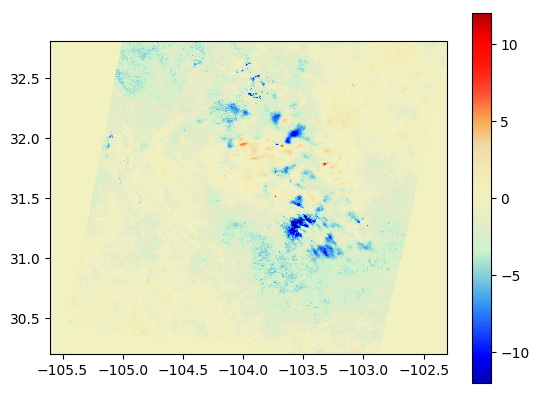

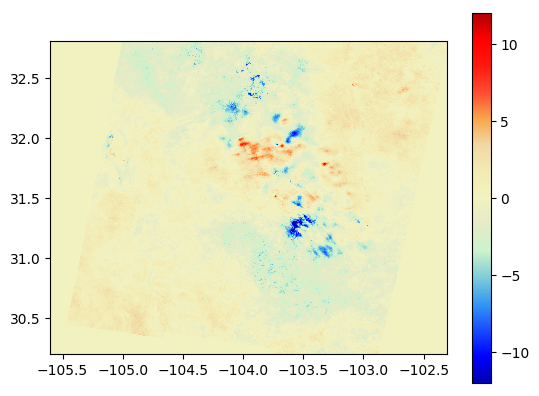

(PyPlot.Figure(PyObject <Figure size 640x480 with 2 Axes>), PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7f74e2edf278>, MapImage{Float32,2}
  image: Array{Float32}((624, 792)) Float32[0.0 0.0 … 0.64372295 0.561648; 0.0 0.0 … -0.011690677 0.026606085; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
  demrsc: Sario.DemRsc
)

In [14]:
plot_img("velocities_2018_linear_max800.h5", vm=12, shift=.2, cmap="seismic_wide_y")
plot_img("velocities_2018_linear_max800_newref.h5", vm=12, shift=.2, cmap="seismic_wide_y")

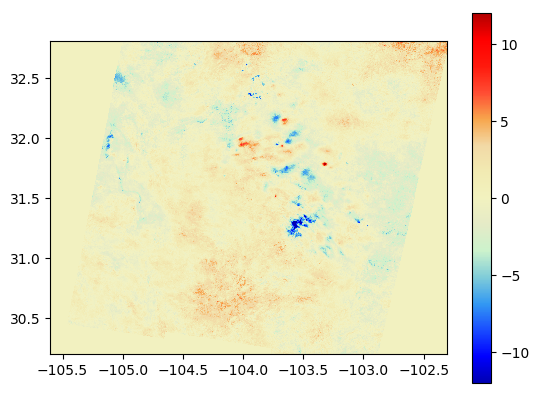

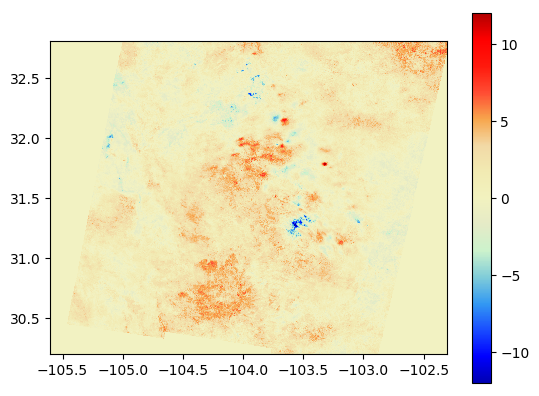

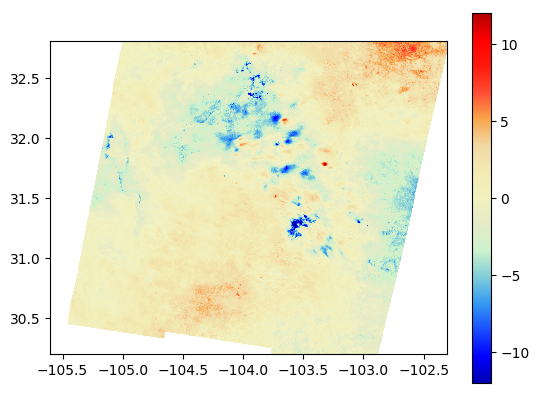

(PyPlot.Figure(PyObject <Figure size 640x480 with 2 Axes>), PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7f74e28dfcc0>, MapImage{Float32,2}
  image: Array{Float32}((624, 792)) Float32[NaN NaN … 4.174209 4.590151; NaN NaN … 4.1351266 4.529116; … ; NaN NaN … NaN NaN; NaN NaN … NaN NaN]
  demrsc: Sario.DemRsc
)

In [23]:
plot_img("velocities_2017_linear_max700.h5", vm=12, shift=.20, cmap="seismic_wide_y")
plot_img("velocities_2017_linear_max800_newref.h5", vm=12, shift=.0, cmap="seismic_wide_y")
plot_img("velocities_2017_stackavg_max800.h5", vm=12, shift=.0, cmap="seismic_wide_y")

In [43]:
rms(get_gps_error("velocities_2017_linear_max800_newref.h5", station_name_list85, 
        dset="velos/1", verbose=true, window=5, shift=-1.95, ref_station=nothing))

station_name = "TXKM"
GPS velocity (mm / year): 0.17735475899548406
InSAR linear velocity (mm / year): 0.0013728618621826616
station_name = "TXMH"
GPS velocity (mm / year): 0.1662832789367195
InSAR linear velocity (mm / year): -0.8591591835021972
station_name = "TXFS"
GPS velocity (mm / year): 0.3935477320754615
InSAR linear velocity (mm / year): -2.152386721968651
station_name = "TXAL"
GPS velocity (mm / year): -1.184208198387005
InSAR linear velocity (mm / year): -0.166934323310852
station_name = "NMHB"
GPS velocity (mm / year): 0.46682962042463033
InSAR linear velocity (mm / year): 0.24996404647827153
station_name = "TXAD"
GPS velocity (mm / year): 0.5626453965430546
InSAR linear velocity (mm / year): 1.4065268516540528


1.2488859596013369

unw_stack_file = "unw_stack_txkm.h5"
Ignoring the following .geo dates:
Date[2015-12-17]
Ignoring 81 igrams listed in geolist_ignore.txt
Keeping data only before max_date: 2018-01-01
Ignoring 167 igrams with longer baseline than 800 days
Ignoring 2047 igrams total
unw_stack_file = "unw_stack_txkm.h5"
Ignoring the following .geo dates:
Date[2015-12-17]
Ignoring 81 igrams listed in geolist_ignore.txt
Keeping data only before max_date: 2018-01-01
Ignoring 0 igrams with longer baseline than 2000 days
Ignoring 1880 igrams total
re shifting to use (233, 640) as reference
Solving: no outlier remove, max temp = 800
prunesolve(geolist, intlist, unw_vals, Blin, 1000, shrink=false) = [8.625883052368085, 8.973041955814471, 7.185488012657792]
Solving: Shrink=false, max temp = 800
prunesolve(geolist, intlist, unw_vals, Blin, sigma, shrink=false) = [5.545709203547108, 5.132896010749225, 4.016965518546404]
Solving: Shrink=false, all igrams
prunesolve(geolist, intlistall, unw_valsall, Blinall, sigma, s

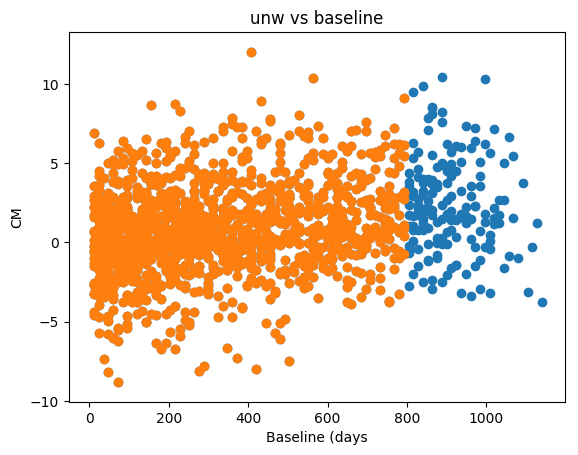

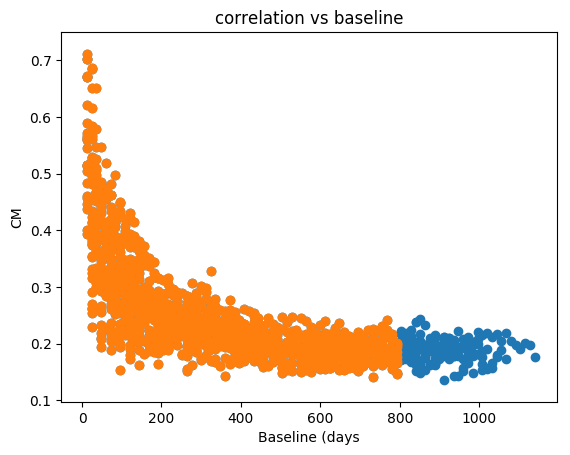

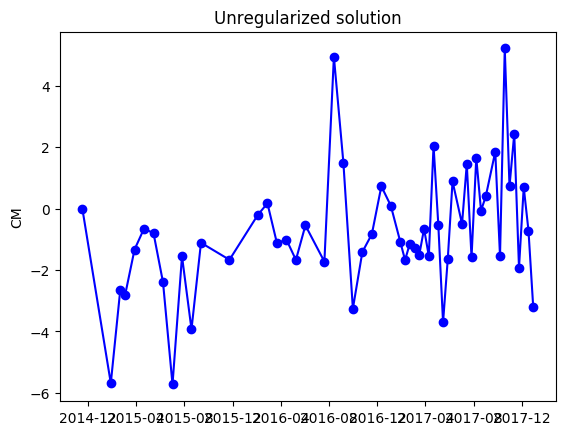

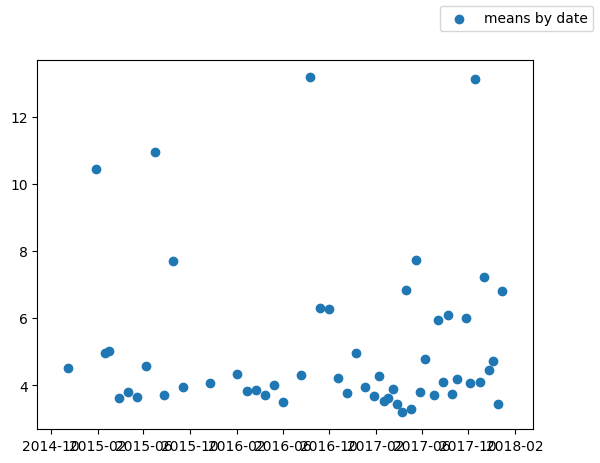

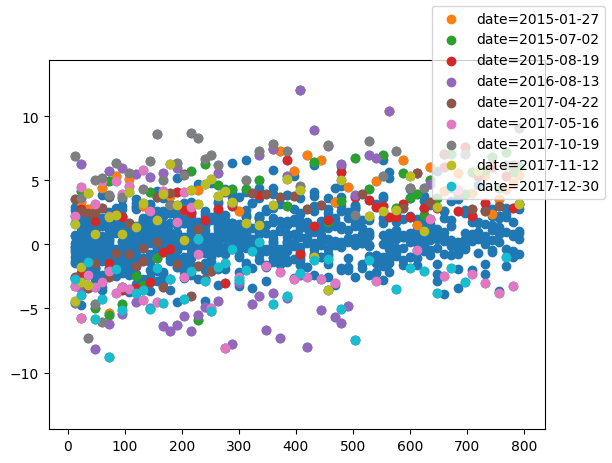

(PyPlot.Figure(PyObject <Figure size 640x480 with 1 Axes>), PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7f74ea742e10>)

In [41]:
demo_point((5, 700), max_temp=800, show=true, refpoint=(233, 640), max_date=Date(2018,1,1))

unw_stack_file = "unw_stack_txkm.h5"
Ignoring the following .geo dates:
Date[2015-12-17]
Ignoring 81 igrams listed in geolist_ignore.txt
Keeping data only before max_date: 2018-01-01
Ignoring 167 igrams with longer baseline than 800 days
Ignoring 2047 igrams total
unw_stack_file = "unw_stack_txkm.h5"
Ignoring the following .geo dates:
Date[2015-12-17]
Ignoring 81 igrams listed in geolist_ignore.txt
Keeping data only before max_date: 2018-01-01
Ignoring 0 igrams with longer baseline than 2000 days
Ignoring 1880 igrams total
Solving: no outlier remove, max temp = 800
prunesolve(geolist, intlist, unw_vals, Blin, 1000, shrink=false) = [6.034262399267701, 6.337840202175876, 5.6036983055723715]
Solving: Shrink=false, max temp = 800
prunesolve(geolist, intlist, unw_vals, Blin, sigma, shrink=false) = [5.309265838225775, 5.13782933806582, 4.657271418482181]
Solving: Shrink=false, all igrams
prunesolve(geolist, intlistall, unw_valsall, Blinall, sigma, shrink=false) = [4.0996058780168685, 4.05069

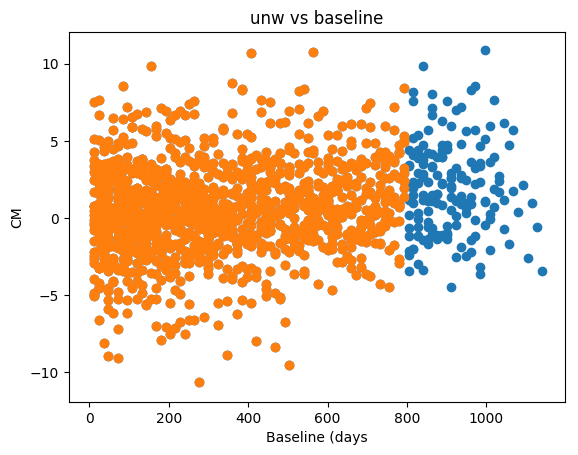

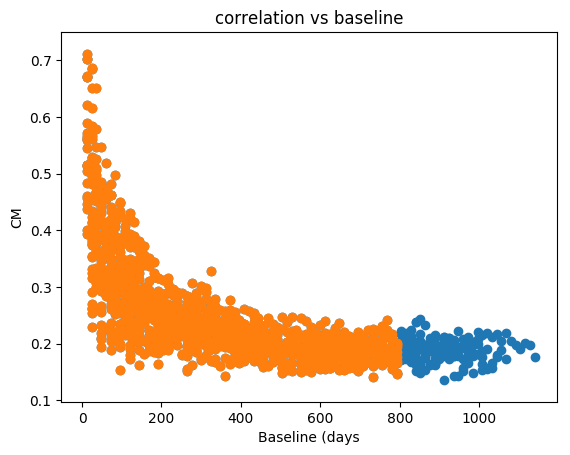

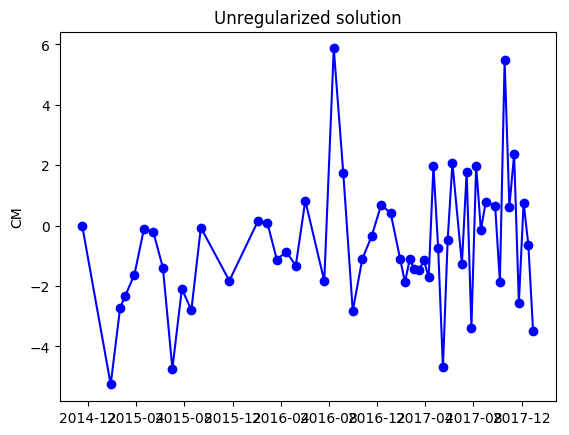

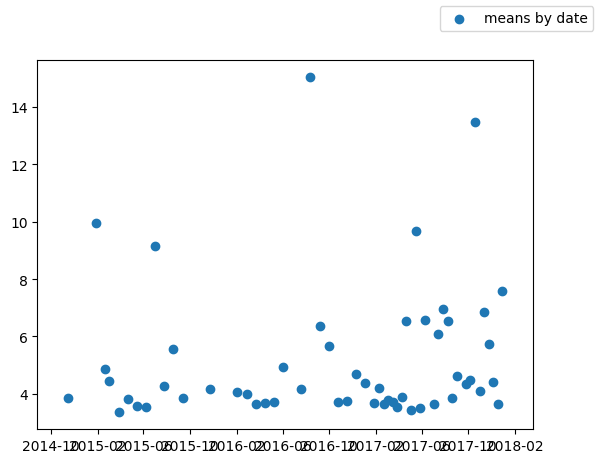

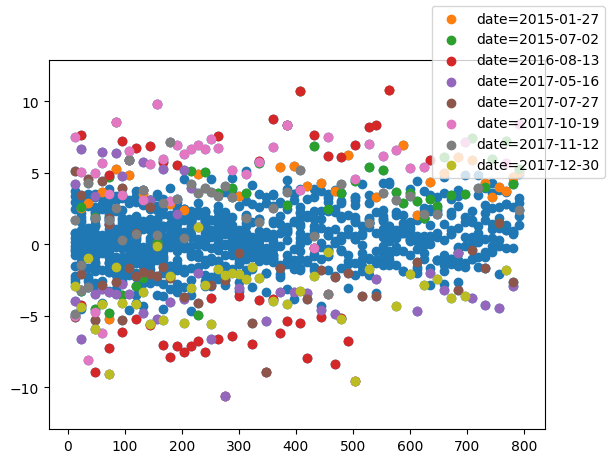

(PyPlot.Figure(PyObject <Figure size 640x480 with 1 Axes>), PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7f74e2b34160>)

In [42]:
demo_point((5, 700), max_temp=800, show=true, max_date=Date(2018,1,1))

In [3]:
unw_stack =  permutedims(h5read("unw_stack.h5", "stack_flat"), (2,1,3))

HDF5-DIAG: Error detected in HDF5 (1.10.4) thread 0:
  #000: H5F.c line 370 in H5Fis_hdf5(): unable open file
    major: File accessibilty
    minor: Not an HDF5 file
  #001: H5Fint.c line 802 in H5F__is_hdf5(): unable to open file
    major: Low-level I/O
    minor: Unable to initialize object
  #002: H5FD.c line 734 in H5FD_open(): open failed
    major: Virtual File Layer
    minor: Unable to initialize object
  #003: H5FDsec2.c line 346 in H5FD_sec2_open(): unable to open file: name = 'unw_stack.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0
    major: File accessibilty
    minor: Unable to open file


ErrorException: Cannot access file unw_stack.h5

In [55]:
geolist, intlist, valid_igram_indices = load_geolist_intlist("unw_stack.h5", "geolist_ignore.txt", 800,
                                                             min_date=Date(2017, 1, 1))

unw_stack_file = "unw_stack.h5"
Ignoring the following .geo dates:
Date[2015-12-17]
Ignoring 81 igrams listed in geolist_ignore.txt
Keeping data after min_date: 2017-01-01
Ignoring 9 igrams with longer baseline than 800 days
Ignoring 1835 igrams total


(Date[2017-01-04, 2017-01-28, 2017-02-09, 2017-02-21, 2017-03-05, 2017-03-17, 2017-03-29, 2017-04-10, 2017-04-22, 2017-05-04  …  2018-08-03, 2018-10-26, 2018-11-19, 2018-12-01, 2018-12-13, 2018-12-25, 2019-01-06, 2019-01-18, 2019-01-30, 2019-07-05], Tuple{Date,Date}[(2017-01-04, 2017-01-28), (2017-01-04, 2017-02-09), (2017-01-04, 2017-02-21), (2017-01-04, 2017-03-05), (2017-01-04, 2017-03-17), (2017-01-04, 2017-03-29), (2017-01-04, 2017-04-10), (2017-01-04, 2017-04-22), (2017-01-04, 2017-05-04), (2017-01-04, 2017-05-16)  …  (2018-12-25, 2019-01-06), (2018-12-25, 2019-01-18), (2018-12-25, 2019-01-30), (2018-12-25, 2019-07-05), (2019-01-06, 2019-01-18), (2019-01-06, 2019-01-30), (2019-01-06, 2019-07-05), (2019-01-18, 2019-01-30), (2019-01-18, 2019-07-05), (2019-01-30, 2019-07-05)], Union{Nothing, Int64}[1827, 1828, 1829, 1830, 1831, 1832, 1833, 1834, 1835, 1836  …  3302, 3303, 3304, 3305, 3306, 3307, 3308, 3309, 3310, 3311])

In [65]:
@time include("/home/scott/repos/InsarTimeseries.jl/scripts/old_sbas.jl")
@time run_sbas(unw_stack[:, :, valid_igram_indices], "velos_check1.h5", "velos/1", geolist, intlist, true, 0)

  0.080353 seconds (11.33 k allocations: 779.291 KiB)
Using least squares for fitting
Out size: (624, 792)


InterruptException: InterruptException:

In [4]:
Threads.@threads for i = 1:10
    println("$(Threads.threadid())")
end

1
9
7
5
8
6
2
4
10
3
